In [1]:
'''
  Temel Bileşen Analizi
//=============================
  - Temel bileşen analizi(TBA), çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümünü, varyansı maksimize edecek şekilde bulma yöntemidir.
  - Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir.
  - Daha sonrada bu doğruya dik olanlar arasından yine en uygun doğru seçilerek, bu adımlar, yeni bir boyutun varyansı belirli bir eşiğin altına inene kadar tekrarlanır.
  - Bu sürecin sonunda elde edilen doğrular, bir doğrusal uzayın tabanlarını oluşturur. Bu taban vektörlerine temel bileşen denir.
  - Verinin temel bileşenleri birbirlerinden bağımsız olur.
'''

'\n  Temel Bileşen Analizi\n//=============================\n  - Temel bileşen analizi(TBA), çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümünü, varyansı maksimize edecek şekilde bulma yöntemidir.\n  - Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir.\n  - Daha sonrada bu doğruya dik olanlar arasından yine en uygun doğru seçilerek, bu adımlar, yeni bir boyutun varyansı belirli bir eşiğin altına inene kadar tekrarlanır.\n  - Bu sürecin sonunda elde edilen doğrular, bir doğrusal uzayın tabanlarını oluşturur. Bu taban vektörlerine temel bileşen denir.\n  - Verinin temel bileşenleri birbirlerinden bağımsız olur.\n'

Dimensionality reduction
//=============================
Dikkate alınacak rastgele değişkenlerin sayısının azaltılması.
  - Uygulamalar : Görselleştirme, Artan verimlilik
  - Algoritmalar : PCA, kPCA, Dictionary Learning, NMF or NNMF, LDA
  


In [2]:
# IRIS VERİ SETİ

import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 

from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data

feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data, columns=feature_names)
df["sinif"] = y

df.head(5) 




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Temel Bileşen Analizi Uygulaması


# Temel bileşenlerden 2 tanesini elde edelim.
 # PCA
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) # whiten = normalize
pca.fit(data)

x_pca = pca.transform(data)

print("variance ratio ", pca.explained_variance_ratio_)

print("sum ", sum(pca.explained_variance_ratio_))

variance ratio  [0.92461872 0.05306648]
sum  0.977685206318795


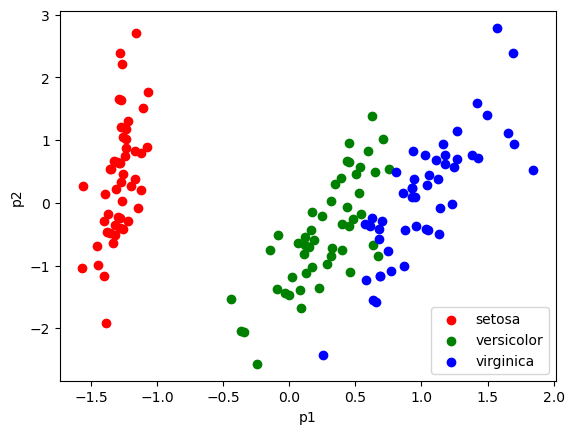

In [4]:
# temel bileşenleri görselleştirme

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red", "green", "blue"]

for each in range(3):
  plt.scatter(df.p1[df.sinif == each], df.p2[df.sinif == each], color = color[each], label = iris.target_names[each])
  
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [5]:
# PCA ve kernel PCA karşılaştırma örneği
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)


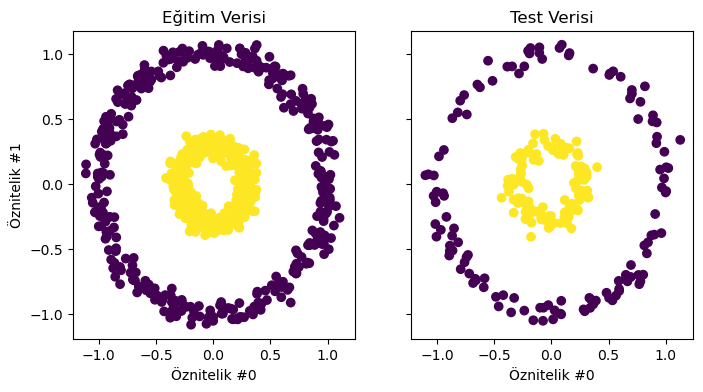

In [6]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))

train_ax.scatter(X_train[:,0], X_train[:,1], c=y_train)
train_ax.set_ylabel("Öznitelik #1")
train_ax.set_xlabel("Öznitelik #0")
train_ax.set_title("Eğitim Verisi")

test_ax.scatter(X_test[:, 0], X_test[:,1], c=y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")

In [7]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
  n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

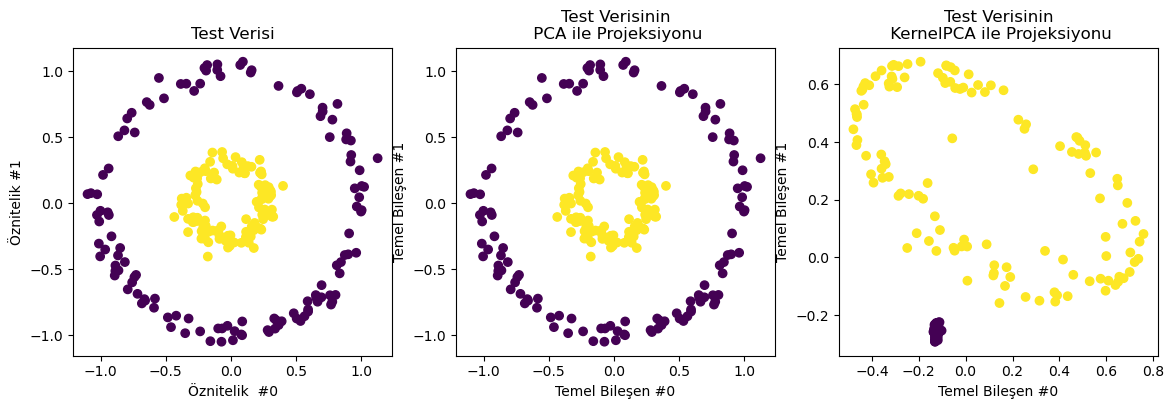

In [8]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
  ncols=3, figsize=(14,4)
)

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik  #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
pca_proj_ax.set_ylabel("Temel Bileşen #1")
pca_proj_ax.set_xlabel("Temel Bileşen #0")
pca_proj_ax.set_title("Test Verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:,0], X_test_kernel_pca[:,1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Temel Bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel Bileşen #0")
_ = kernel_pca_proj_ax.set_title("Test Verisinin\n KernelPCA ile Projeksiyonu")


In [9]:
# recontruction - geri oluşturma
X_recontructed_pca = pca.inverse_transform(pca.transform(X_test))
X_recontructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

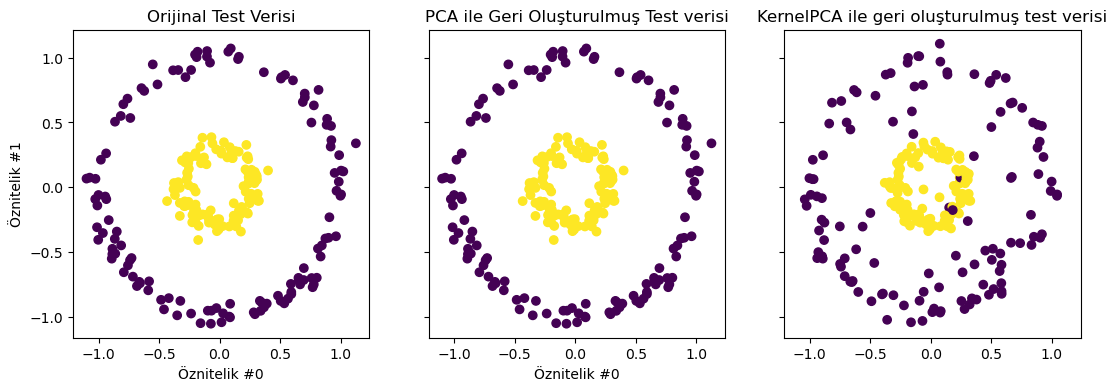

In [15]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_oroj_ax) = plt.subplots(
  ncols=3, sharex=True, sharey=True, figsize=(13,4)
)

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Orijinal Test Verisi")

pca_back_proj_ax.scatter(X_recontructed_pca[:,0], X_recontructed_pca[:,1], c=y_test)
pca_back_proj_ax.set_xlabel("Öznitelik #0")
pca_back_proj_ax.set_title("PCA ile Geri Oluşturulmuş Test verisi")

kernel_pca_back_oroj_ax.scatter(
  X_recontructed_kernel_pca[:,0], X_recontructed_kernel_pca[:,1],  c=y_test
)

kernel_pca_proj_ax.set_xlabel("Öznitelik #0")
_ = kernel_pca_back_oroj_ax.set_title("KernelPCA ile geri oluşturulmuş test verisi")



In [16]:
# Varyans Temelli Öznitelik Seçimi
from sklearn.feature_selection import VarianceThreshold

X = [[0,0,1], [0,1,0], [1,0,0], [0,1,1], [0,1,0], [0,1,1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [17]:
sel = VarianceThreshold(threshold=(0.8 * (1-0.8))) # var(x) = p(1-p)
sel.fit_transform(X)
# ilk sütunun elenmesini bekliyoruz
# zira orada 0 değeri olma olasılığı 5/6 > 0.8

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [18]:
# İstatiksel Model Seçimi
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [19]:
X_new = SelectKBest(chi2, k=2).fit_transform(X,y)
X_new.shape

(150, 2)

In [20]:
# Model Temelli Öznitelik Seçimi
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
x, y = load_iris(return_X_y=True)
x.shape

(150, 4)

In [25]:
# L1 normu temelli öznitelik seçimi
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False).fit(x,y)
model = SelectFromModel(lsvc, prefit=True)
x_new = model.transform(x)
x_new.shape

/home/erhanbarisolmez/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(150, 3)

In [ ]:
# L2 normu temelli öznitelik seçimi